In [35]:
#import boto3
import pandas as pd
#from sagemaker import get_execution_role
import matplotlib.pyplot as plt
import numpy as np
import time
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

In [36]:
from pymongo import MongoClient

In [37]:
#!pip install WordCloud

#!pip install pymongo[srv]
#!pip install pymongo

In [38]:
nltk.download('stopwords')
stop = stopwords.words('english')
stopwords = set(STOPWORDS)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
'''role = get_execution_role()
bucket='fakenewstkbucket'
data_key = 'dataset/fake.csv'
data_location = 's3://{}/{}'.format(bucket, data_key)
'''

"role = get_execution_role()\nbucket='fakenewstkbucket'\ndata_key = 'dataset/fake.csv'\ndata_location = 's3://{}/{}'.format(bucket, data_key)\n"

In [40]:
'''data_key_true = 'dataset/true.csv'
data_location_true = 's3://{}/{}'.format(bucket, data_key_true)'''

"data_key_true = 'dataset/true.csv'\ndata_location_true = 's3://{}/{}'.format(bucket, data_key_true)"

In [41]:
df_f = pd.read_csv("C:/path",error_bad_lines = False)
df_t = pd.read_csv("C:/path",error_bad_lines = False)
df_web = pd.read_csv("C:/path", encoding='cp1252')

In [42]:
#df_f.head()
df_f = df_f.dropna()

In [43]:
#sns.distplot(df_f['domain_rank'])

(array([4.576e+03, 3.700e+01, 2.900e+01, 1.000e+01, 4.000e+00, 5.000e+00,
        1.200e+01, 9.000e+00, 7.000e+00, 1.300e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

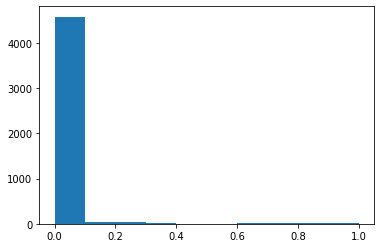

In [44]:
plt.hist(df_f['spam_score'])

In [45]:
#we are removing records who got spam score more that 0.7 as it will help our model to 
#distinguish better between fake and real news
df_f = df_f[df_f['spam_score'] < 0.40]

In [46]:
#df.groupby['language'].apply(lambda x: count(x))
#df[['language']].groupby(['language']).agg(['count'])
df_f.language.value_counts()

english       4330
spanish        132
german         108
russian         25
french          24
turkish          9
italian          7
portuguese       5
arabic           4
norwegian        3
greek            1
finnish          1
chinese          1
polish           1
dutch            1
Name: language, dtype: int64

In [47]:
df_f = df_f[df_f.language.eq('english')]

In [48]:
#trimming .com from behind websites to get to know the publishers name
df_f['site_url'] = df_f['site_url'].str.rstrip('.com') 

In [49]:
#selecting relevant columns so that we can merge it to fake dataset
df_f_m = df_f.filter(items=['title','text','site_url'])

In [50]:
#adding label column to real news column
df_f_m['label']= 'fake'

In [51]:
#renaming the column names
df_f_m = df_f_m.rename(columns={ "text" : "content", "site_url" : "publication"})

In [52]:
df_t = df_t.filter(items=['title','content','publication','label'])

In [53]:
df_t['label']= 'true'
#df.isna().sum()

In [54]:
df = df_f_m.append(df_t)

In [55]:
df = df[df['title'].notna()]
df = df[df['content'].notna()]
df.count()

title          20042
content        20042
publication    20042
label          20042
dtype: int64

In [56]:
df=df.reset_index(drop=True)

In [57]:
df.dropna()

,title,content,publication,label
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,100percentfedup,fake
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup,fake
2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,100percentfedup,fake
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,100percentfedup,fake
4,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...,100percentfedup,fake
...,...,...,...,...
20037,An eavesdropping Uber driver saved his 16-year...,Uber driver Keith Avila picked up a p...,Washington Post,true
20038,Plane carrying six people returning from a Cav...,Crews on Friday continued to search L...,Washington Post,true
20039,After helping a fraction of homeowners expecte...,When the Obama administration announced a...,Washington Post,true
20040,"Yes, this is real: Michigan just banned bannin...",This story has been updated. A new law in...,Washington Post,true


In [58]:
# Connect to MongoDB
#client =  MongoClient("mongodb+srv://path")

In [59]:
#db = client['project_temp']
#collection = db['scrap']

In [60]:
#data_dict = df_web.to_dict("records")

In [61]:
# Insert collection
#collection.insert_many(data_dict)

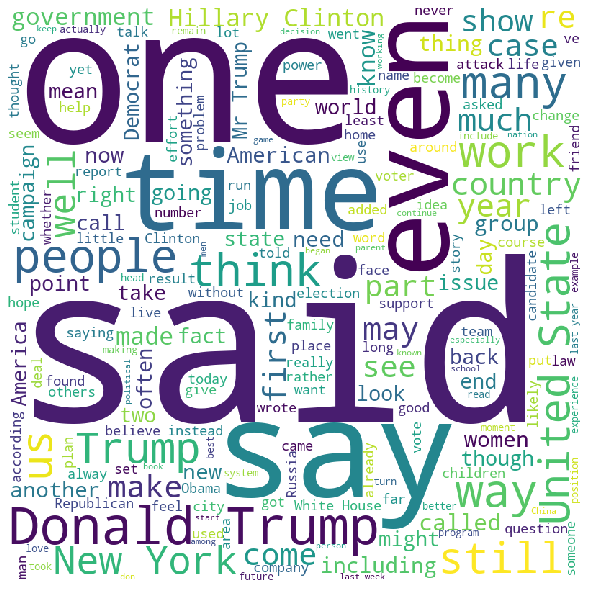

In [63]:
df_t['content_split'] = df_t['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
wordcloud_title_true = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(' '.join(df_t['content_split'])) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_title_true) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

In [26]:
''' #this we did so that we can plot wordcloud for fake news
df_f_m = df_f_m[df_f_m['title'].notna()]'''

In [32]:
df_f['text_split'] = df_f['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

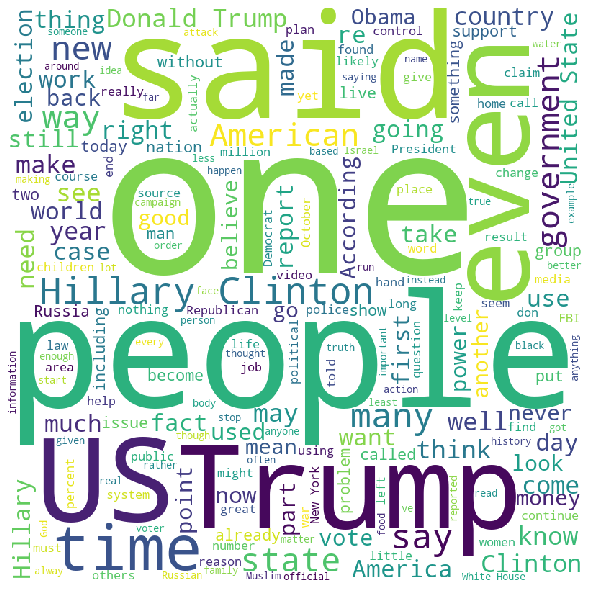

In [33]:
wordcloud_title_false = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(' '.join(df_f['text_split'])) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_title_false) 
plt.axis("off") 
plt.tight_layout(pad = 0)